In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Condition monitoring/RUL Regression/Train_4_RUL.csv')

In [ ]:
df

ID  Cycle   OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  \
0        1      1  42.0049  0.8400   100.0          445.00          549.68   
1        1      2  20.0020  0.7002   100.0          491.19          606.07   
2        1      3  42.0038  0.8409   100.0          445.00          548.95   
3        1      4  42.0000  0.8400   100.0          445.00          548.70   
4        1      5  25.0063  0.6207    60.0          462.54          536.10   
...    ...    ...      ...     ...     ...             ...             ...   
61244  249    251   9.9998  0.2500   100.0          489.05          605.33   
61245  249    252   0.0028  0.0015   100.0          518.67          643.42   
61246  249    253   0.0029  0.0000   100.0          518.67          643.68   
61247  249    254  35.0046  0.8400   100.0          449.44          555.77   
61248  249    255  42.0030  0.8400   100.0          445.00          549.85   

       SensorMeasure3  SensorMeasure4  SensorMeasure5  ...  SensorMeasure13  \
0             1343.43         1112.93            3.91  ...          2387.99   
1             1477.61         1237.50            9.35  ...          2387.73   
2             1343.12         1117.05            3.91  ...          2387.97   
3             1341.24         1118.03            3.91  ...          2388.02   
4             1255.23         1033.59            7.05  ...          2028.08   
...               ...             ...             ...  ...              ...   
61244         1516.36         1315.28           10.52  ...          2388.73   
61245         1598.92         1426.77           14.62  ...          2388.46   
61246         1607.72         1430.56           14.62  ...          2388.48   
61247         1381.29         1148.18            5.48  ...          2388.83   
61248         1369.75         1147.45            3.91  ...          2388.66   

       SensorMeasure14  SensorMeasure15  SensorMeasure16  SensorMeasure17  \
0              8074.83           9.3335             0.02              330   
1              8046.13           9.1913             0.02              361   
2              8066.62           9.4007             0.02              329   
3              8076.05           9.3369             0.02              328   
4              7865.80          10.8366             0.02              305   
...                ...              ...              ...              ...   
61244          8185.69           8.4541             0.03              372   
61245          8185.47           8.2221             0.03              396   
61246          8193.94           8.2525             0.03              395   
61247          8125.64           9.0515             0.02              337   
61248          8144.33           9.1207             0.02              333   

       SensorMeasure18  SensorMeasure19  SensorMeasure20  SensorMeasure21  RUL  
0                 2212           100.00            10.62           6.3670  320  
1                 2324           100.00            24.37          14.6552  319  
2                 2212           100.00            10.48           6.4213  318  
3                 2212           100.00            10.54           6.4176  317  
4                 1915            84.93            14.03           8.6754  316  
...                ...              ...              ...              ...  ...  
61244             2319           100.00            29.11          17.5234    4  
61245             2388           100.00            39.38          23.7151    3  
61246             2388           100.00            39.78          23.8270    2  
61247             2223           100.00            15.26           9.0774    1  
61248             2212           100.00            10.66           6.4341    0  

[61249 rows x 27 columns]

In [ ]:
#generate descriptive statistics
df.describe()

ID         Cycle        OpSet1        OpSet2        OpSet3  \
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000   
mean     124.325181    134.311417     23.999823      0.571347     94.031576   
std       71.995350     89.783389     14.780722      0.310703     14.251954   
min        1.000000      1.000000      0.000000      0.000000     60.000000   
25%       60.000000     62.000000     10.004600      0.250700    100.000000   
50%      126.000000    123.000000     25.001400      0.700000    100.000000   
75%      185.000000    191.000000     41.998100      0.840000    100.000000   
max      249.000000    543.000000     42.008000      0.842000    100.000000   

       SensorMeasure1  SensorMeasure2  SensorMeasure3  SensorMeasure4  \
count    61249.000000    61249.000000    61249.000000    61249.000000   
mean       472.882435      579.420056     1417.896600     1201.915359   
std         26.436832       37.342647      106.167598      119.327591   
min        445.000000      535.480000     1242.670000     1024.420000   
25%        445.000000      549.330000     1350.550000     1119.490000   
50%        462.540000      555.740000     1367.680000     1136.920000   
75%        491.190000      607.070000     1497.420000     1302.620000   
max        518.670000      644.420000     1613.000000     1440.770000   

       SensorMeasure5  ...  SensorMeasure13  SensorMeasure14  SensorMeasure15  \
count    61249.000000  ...     61249.000000     61249.000000     61249.000000   
mean         8.031626  ...      2334.427590      8067.811812         9.285604   
std          3.622872  ...       128.197859        85.670543         0.750374   
min          3.910000  ...      2027.570000      7845.780000         8.175700   
25%          3.910000  ...      2387.910000      8062.630000         8.648000   
50%          7.050000  ...      2388.060000      8083.810000         9.255600   
75%         10.520000  ...      2388.170000      8128.350000         9.365800   
max         14.620000  ...      2390.490000      8261.650000        11.066300   

       SensorMeasure16  SensorMeasure17  SensorMeasure18  SensorMeasure19  \
count     61249.000000     61249.000000     61249.000000     61249.000000   
mean          0.023252       347.760029      2228.613283        97.751396   
std           0.004685        27.808283       145.472491         5.369424   
min           0.020000       302.000000      1915.000000        84.930000   
25%           0.020000       330.000000      2212.000000       100.000000   
50%           0.020000       334.000000      2223.000000       100.000000   
75%           0.030000       368.000000      2324.000000       100.000000   
max           0.030000       399.000000      2388.000000       100.000000   

       SensorMeasure20  SensorMeasure21           RUL  
count     61249.000000     61249.000000  61249.000000  
mean         20.864333        12.518995    133.311417  
std           9.936396         5.962697     89.783389  
min          10.160000         6.084300      0.000000  
25%          10.940000         6.566100     61.000000  
50%          14.930000         8.960100    122.000000  
75%          28.560000        17.135500    190.000000  
max          39.890000        23.885200    542.000000  

[8 rows x 27 columns]

In [ ]:
df.nunique(axis=0)  #Count distinct observations over requested axis.

ID                   249
Cycle                543
OpSet1               536
OpSet2               105
OpSet3                 2
SensorMeasure1         6
SensorMeasure2      1704
SensorMeasure3     13558
SensorMeasure4     17353
SensorMeasure5         6
SensorMeasure6        46
SensorMeasure7      5926
SensorMeasure8      1038
SensorMeasure9     25297
SensorMeasure10       21
SensorMeasure11      737
SensorMeasure12     5627
SensorMeasure13      483
SensorMeasure14    15938
SensorMeasure15    11915
SensorMeasure16        2
SensorMeasure17       54
SensorMeasure18        6
SensorMeasure19        2
SensorMeasure20      652
SensorMeasure21    21574
RUL                  543
dtype: int64

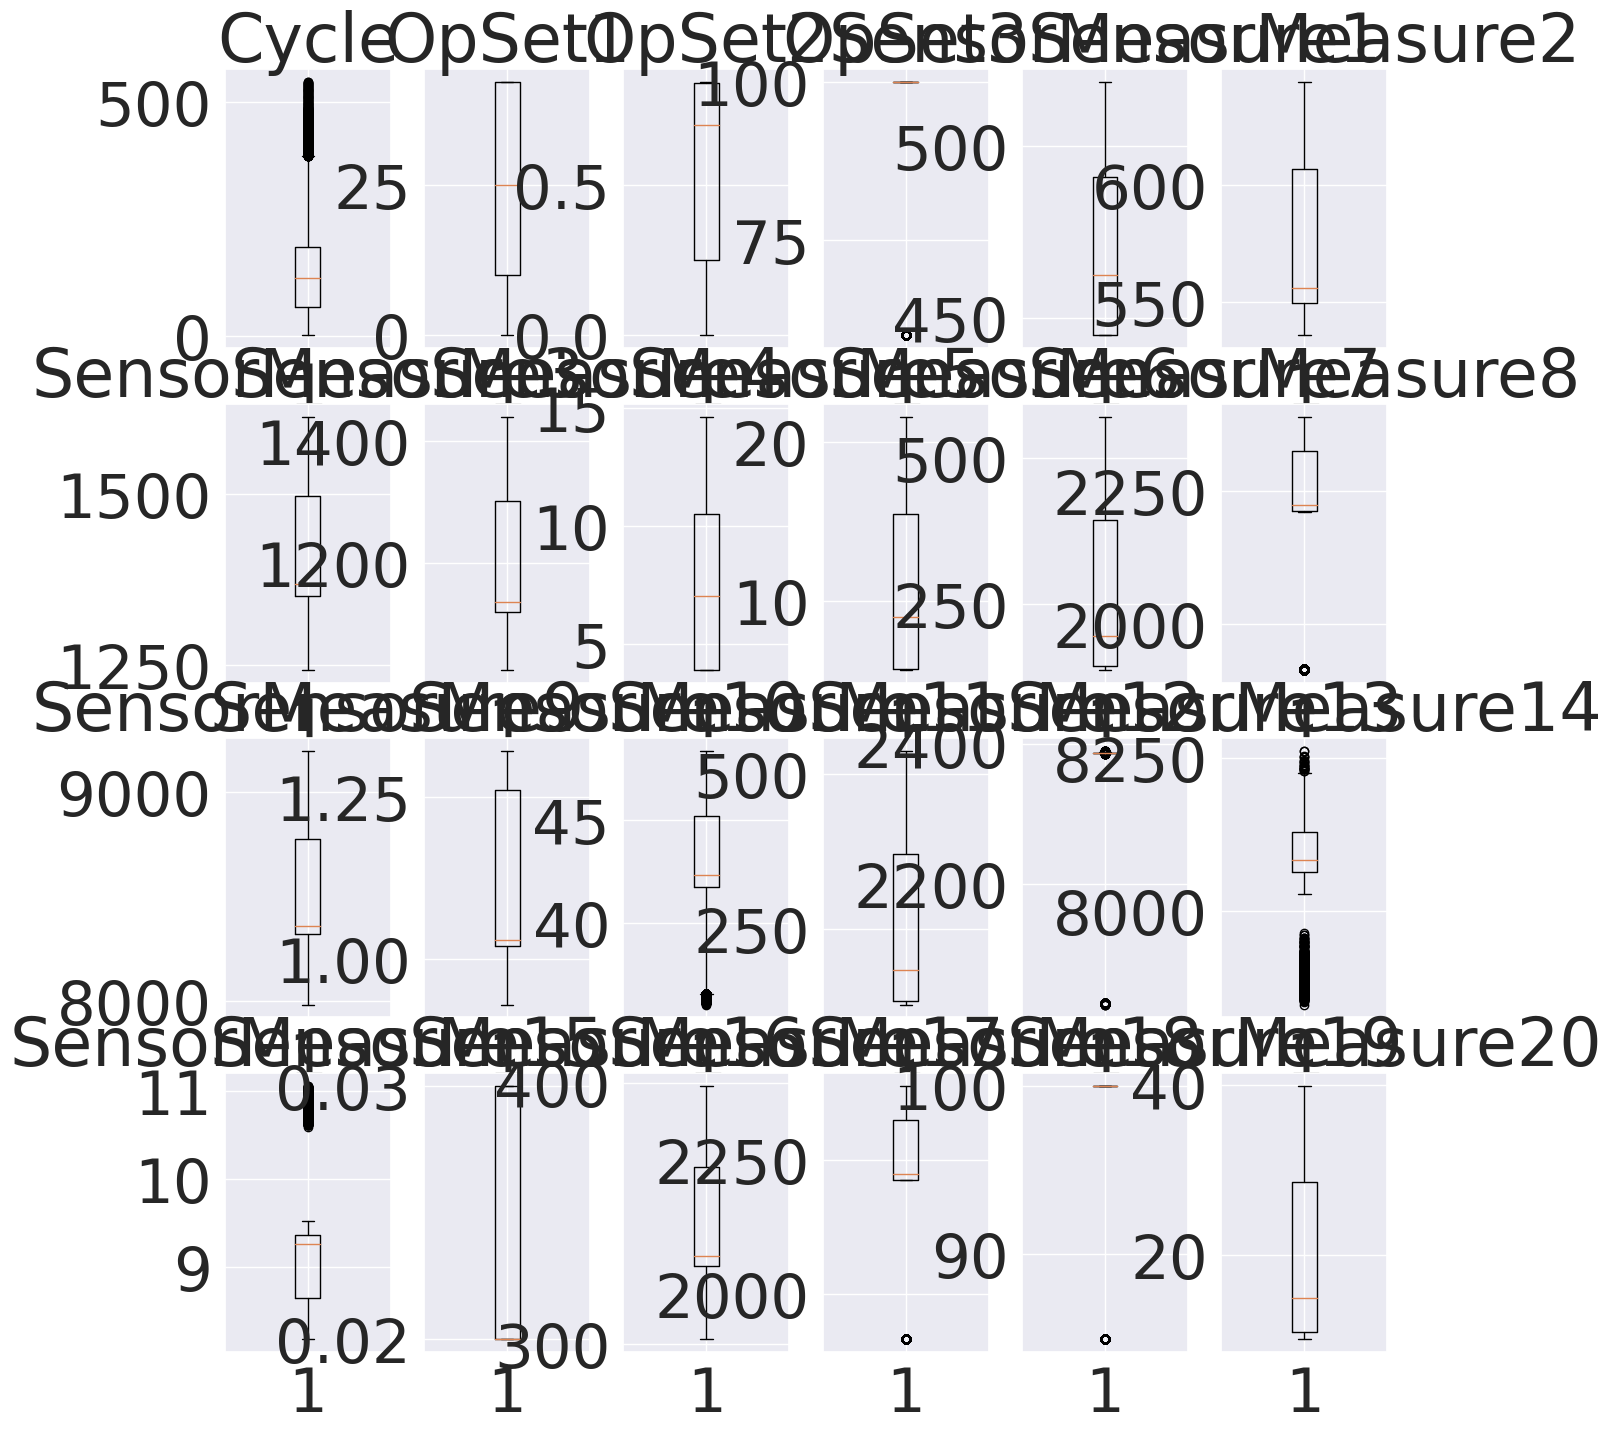

In [ ]:
plt.figure(figsize = (15, 21))
for i in np.arange(1, 25):        # column 5 in python means actual 6th column
    temp = df.iloc[:, i]
    plt.subplot(5,6, i)
    plt.boxplot(temp)           # Make a box and whisker plot.
    plt.title(df.columns[i])
plt.show()

In [ ]:
# dropping those columns which are having constant values
df.drop(columns=['OpSet3', 'SensorMeasure1', 'SensorMeasure5', 'SensorMeasure10', 'SensorMeasure16', 'SensorMeasure18', 'SensorMeasure19'], inplace=True)
df.head()

ID  Cycle   OpSet1  OpSet2  SensorMeasure2  SensorMeasure3  SensorMeasure4  \
0   1      1  42.0049  0.8400          549.68         1343.43         1112.93   
1   1      2  20.0020  0.7002          606.07         1477.61         1237.50   
2   1      3  42.0038  0.8409          548.95         1343.12         1117.05   
3   1      4  42.0000  0.8400          548.70         1341.24         1118.03   
4   1      5  25.0063  0.6207          536.10         1255.23         1033.59   

   SensorMeasure6  SensorMeasure7  SensorMeasure8  SensorMeasure9  \
0            5.70          137.36         2211.86         8311.32   
1           13.61          332.10         2323.66         8713.60   
2            5.69          138.18         2211.92         8306.69   
3            5.70          137.98         2211.88         8312.35   
4            9.00          174.82         1915.22         7994.94   

   SensorMeasure11  SensorMeasure12  SensorMeasure13  SensorMeasure14  \
0            41.69           129.78          2387.99          8074.83   
1            43.94           312.59          2387.73          8046.13   
2            41.66           129.62          2387.97          8066.62   
3            41.68           129.80          2388.02          8076.05   
4            36.48           164.11          2028.08          7865.80   

   SensorMeasure15  SensorMeasure17  SensorMeasure20  SensorMeasure21  RUL  
0           9.3335              330            10.62           6.3670  320  
1           9.1913              361            24.37          14.6552  319  
2           9.4007              329            10.48           6.4213  318  
3           9.3369              328            10.54           6.4176  317  
4          10.8366              305            14.03           8.6754  316

In [ ]:
df.shape

(61249, 20)

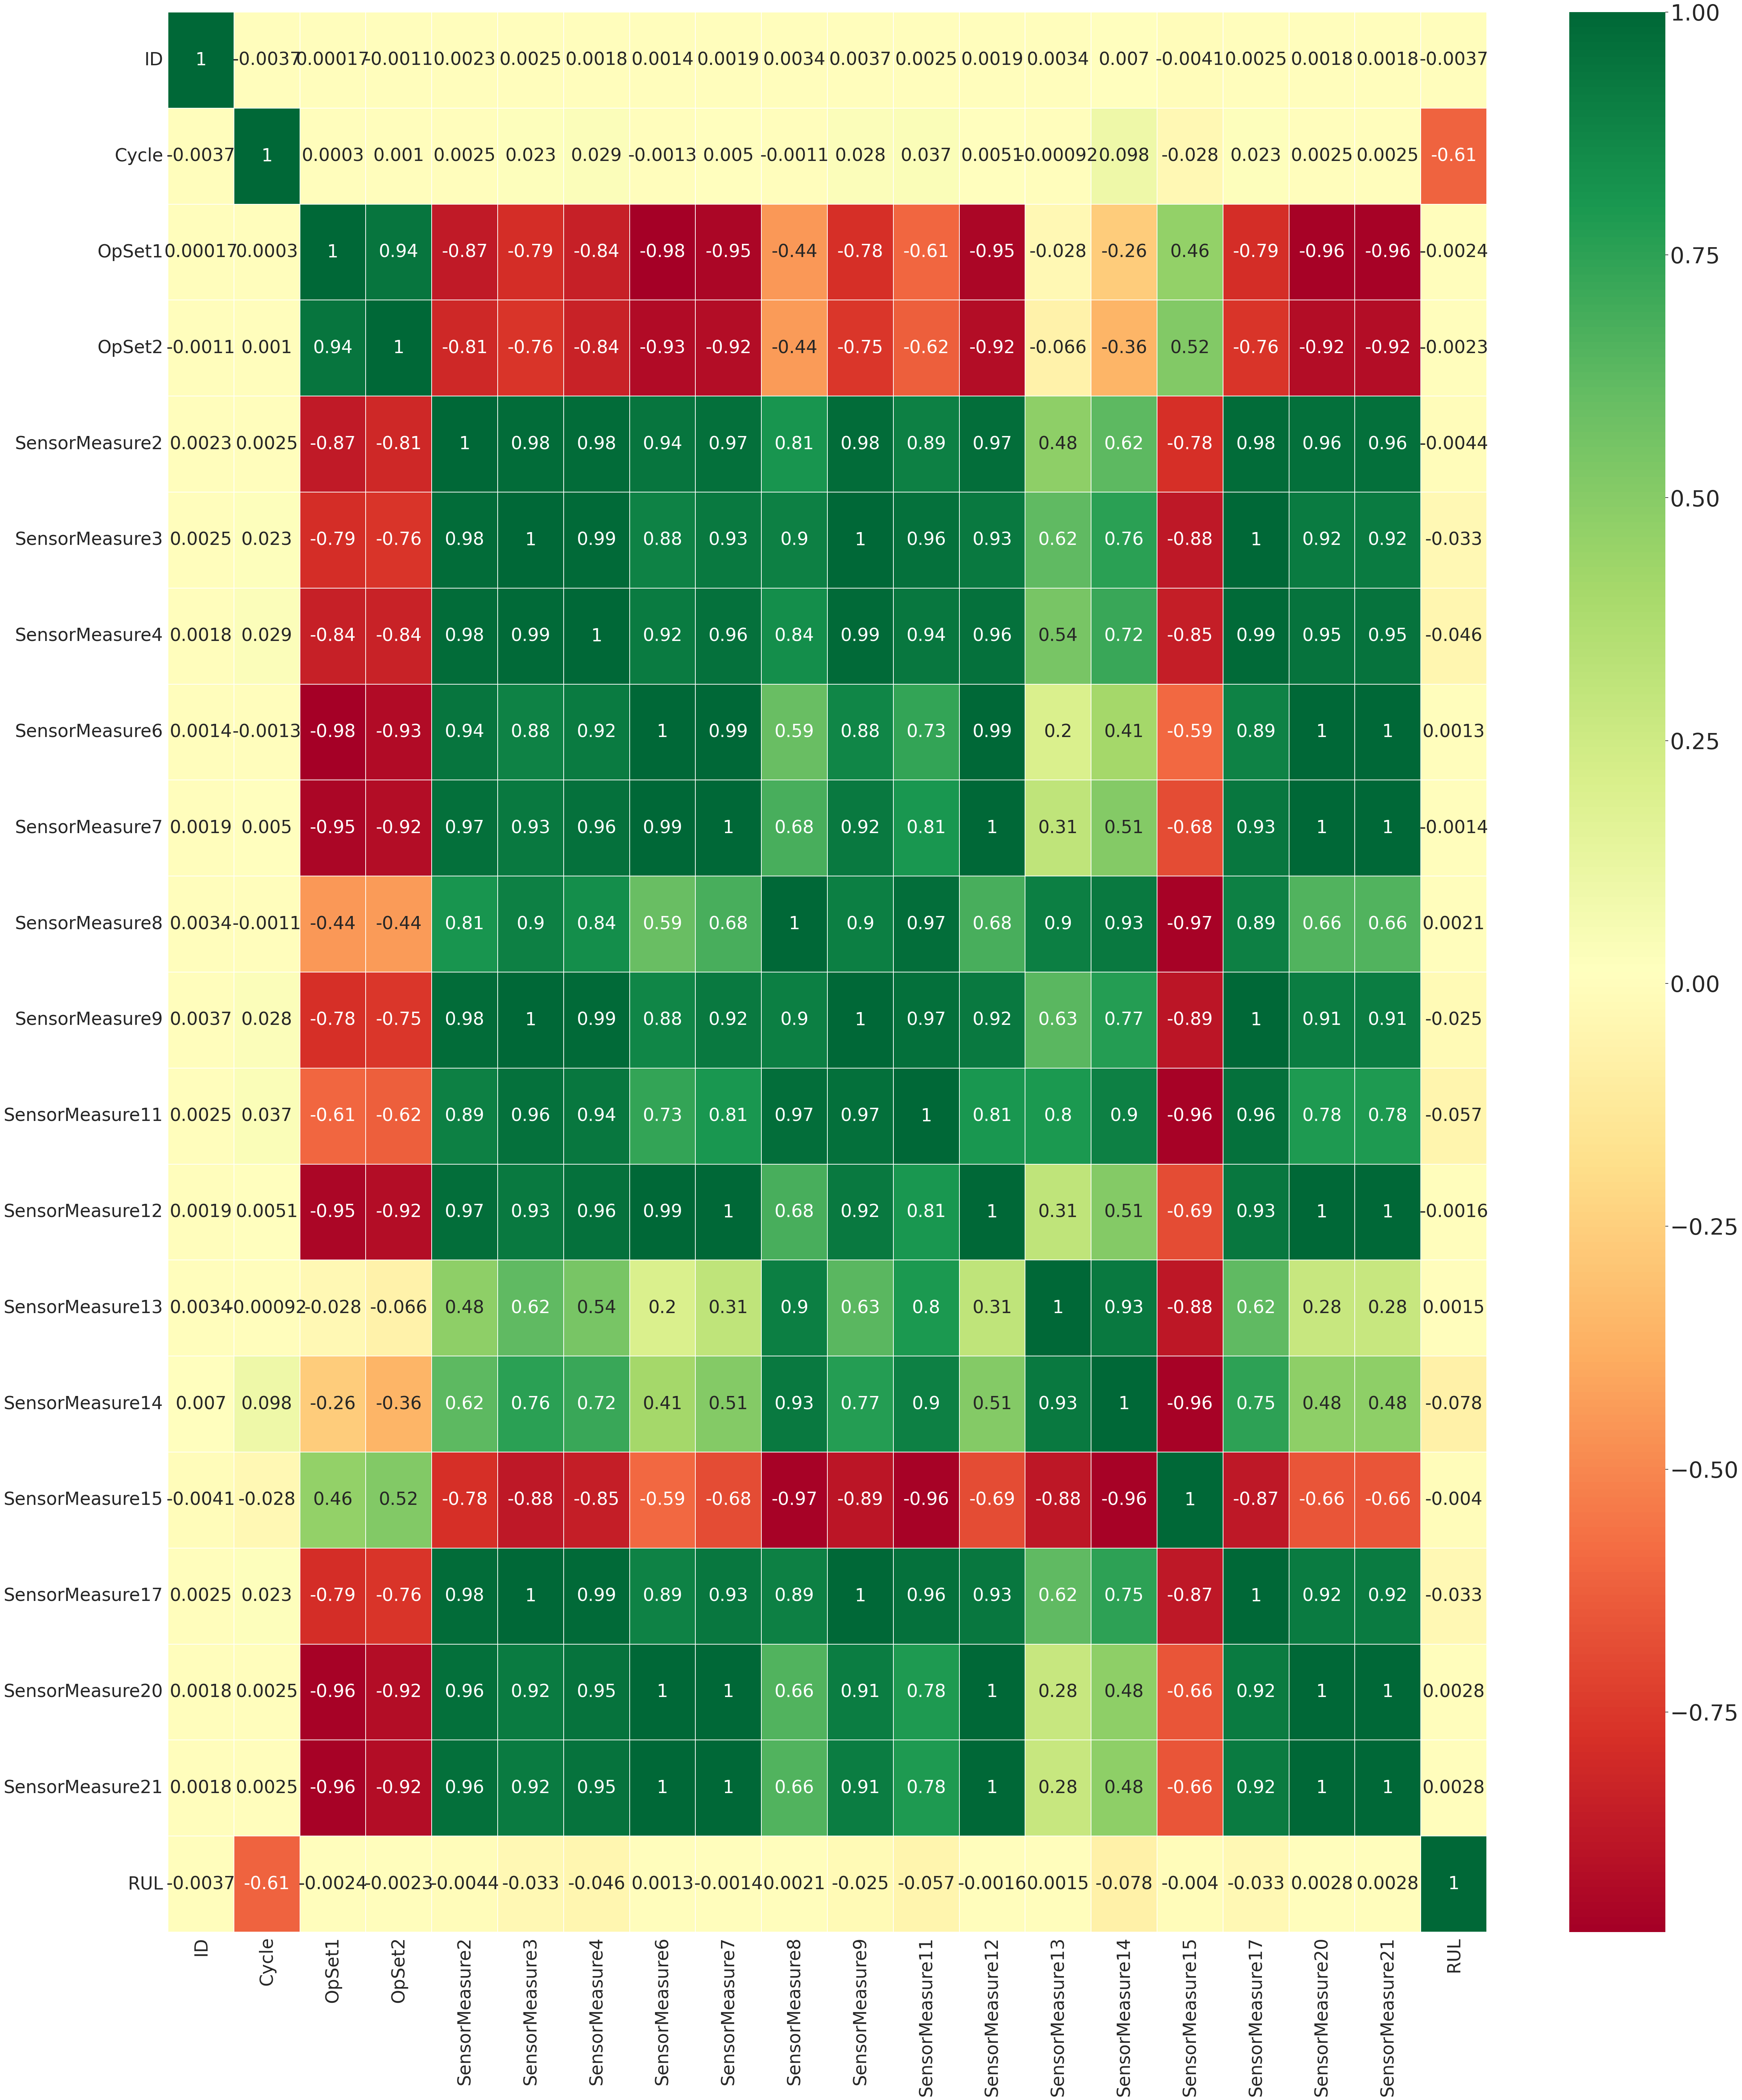

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(58,68))
sns.set(font_scale=4,font="Times New Roman")

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),cmap="RdYlGn", linewidths=0.1, annot=True, annot_kws={"size":35})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 35)
g.set_yticklabels(g.get_xmajorticklabels(), fontsize = 35)
plt.show()

In [ ]:
# dropping the columns Opset1 and Opset2 beacuse they have negligible coorealtion
df.drop(columns=['OpSet1','OpSet2'], inplace=True)

In [ ]:
X = df.iloc[:, 0:16]
y = df.iloc[:, 16]


from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[6.90956018e-06 7.46019941e-06 1.42225928e-01 6.75545200e-02
 8.17352182e-02 1.42020282e-01 9.85097538e-02 9.05347376e-02
 7.75349980e-02 2.59922708e-02 9.45026009e-02 3.55630569e-05
 8.36732464e-06 9.13389990e-04 7.91234675e-02 9.92945327e-02]


<Axes: >

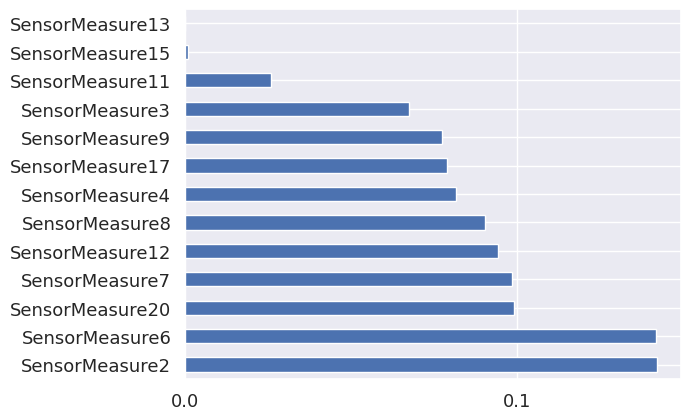

In [ ]:
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances=feat_importances.sort_values( ascending=False)
feat_importances.nlargest(13).plot(kind='barh',fontsize =13)

In [ ]:
df.to_csv('Processed_Train_004.csv', index=None)

## Making test data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Condition monitoring/RUL Regression/Test_4_RUL.csv')

In [ ]:
df.describe()

ID         Cycle        OpSet1        OpSet2        OpSet3  \
count  41214.000000  41214.000000  41214.000000  41214.000000  41214.000000   
mean     120.006017    108.739094     24.115207      0.574725     94.072888   
std       71.685208     83.717459     14.714512      0.308868     14.211218   
min        1.000000      1.000000      0.000000      0.000000     60.000000   
25%       57.000000     43.000000     10.004700      0.250700    100.000000   
50%      118.000000     91.000000     25.001500      0.700000    100.000000   
75%      181.000000    155.000000     41.998100      0.840000    100.000000   
max      248.000000    486.000000     42.008000      0.842000    100.000000   

       SensorMeasure1  SensorMeasure2  SensorMeasure3  SensorMeasure4  \
count    41214.000000    41214.000000    41214.000000    41214.000000   
mean       472.711616      579.069264     1414.951596     1197.321054   
std         26.321455       37.129671      105.423125      118.206367   
min        445.000000      535.420000     1240.940000     1024.900000   
25%        445.000000      549.200000     1348.590000     1116.800000   
50%        462.540000      555.540000     1364.630000     1130.300000   
75%        491.190000      606.910000     1494.990000     1299.440000   
max        518.670000      643.940000     1608.050000     1429.460000   

       SensorMeasure5  ...  SensorMeasure13  SensorMeasure14  SensorMeasure15  \
count    41214.000000  ...     41214.000000     41214.000000     41214.000000   
mean         8.003346  ...      2334.733335      8063.206813         9.284664   
std          3.602107  ...       127.827832        84.126742         0.744338   
min          3.910000  ...      2027.740000      7849.800000         8.204000   
25%          3.910000  ...      2387.890000      8060.970000         8.636200   
50%          7.050000  ...      2388.030000      8079.705000         9.261050   
75%         10.520000  ...      2388.110000      8125.830000         9.352375   
max         14.620000  ...      2389.220000      8196.800000        11.017000   

       SensorMeasure16  SensorMeasure17  SensorMeasure18  SensorMeasure19  \
count     41214.000000     41214.000000     41214.000000     41214.000000   
mean          0.023029       346.976319      2228.560392        97.766960   
std           0.004595        27.604875       144.868684         5.354077   
min           0.020000       302.000000      1915.000000        84.930000   
25%           0.020000       330.000000      2212.000000       100.000000   
50%           0.020000       334.000000      2223.000000       100.000000   
75%           0.030000       368.000000      2324.000000       100.000000   
max           0.030000       397.000000      2388.000000       100.000000   

       SensorMeasure20  SensorMeasure21           RUL  
count     41214.000000     41214.000000  41214.000000  
mean         20.798613        12.479669    181.899597  
std           9.880486         5.928765     92.168917  
min          10.190000         6.145300      6.000000  
25%          10.890000         6.538275    117.000000  
50%          14.930000         8.958850    171.000000  
75%          28.580000        17.148200    234.000000  
max          39.710000        23.829800    553.000000  

[8 rows x 27 columns]

In [ ]:
df.nunique(axis=0)  #Count distinct observations over requested axis.

ID                   248
Cycle                486
OpSet1               536
OpSet2               105
OpSet3                 2
SensorMeasure1         6
SensorMeasure2      1480
SensorMeasure3     11326
SensorMeasure4     13257
SensorMeasure5         6
SensorMeasure6        61
SensorMeasure7      4173
SensorMeasure8       709
SensorMeasure9     18503
SensorMeasure10       18
SensorMeasure11      657
SensorMeasure12     3963
SensorMeasure13      307
SensorMeasure14    12152
SensorMeasure15     8724
SensorMeasure16        2
SensorMeasure17       49
SensorMeasure18        6
SensorMeasure19        2
SensorMeasure20      536
SensorMeasure21    16453
RUL                  548
dtype: int64

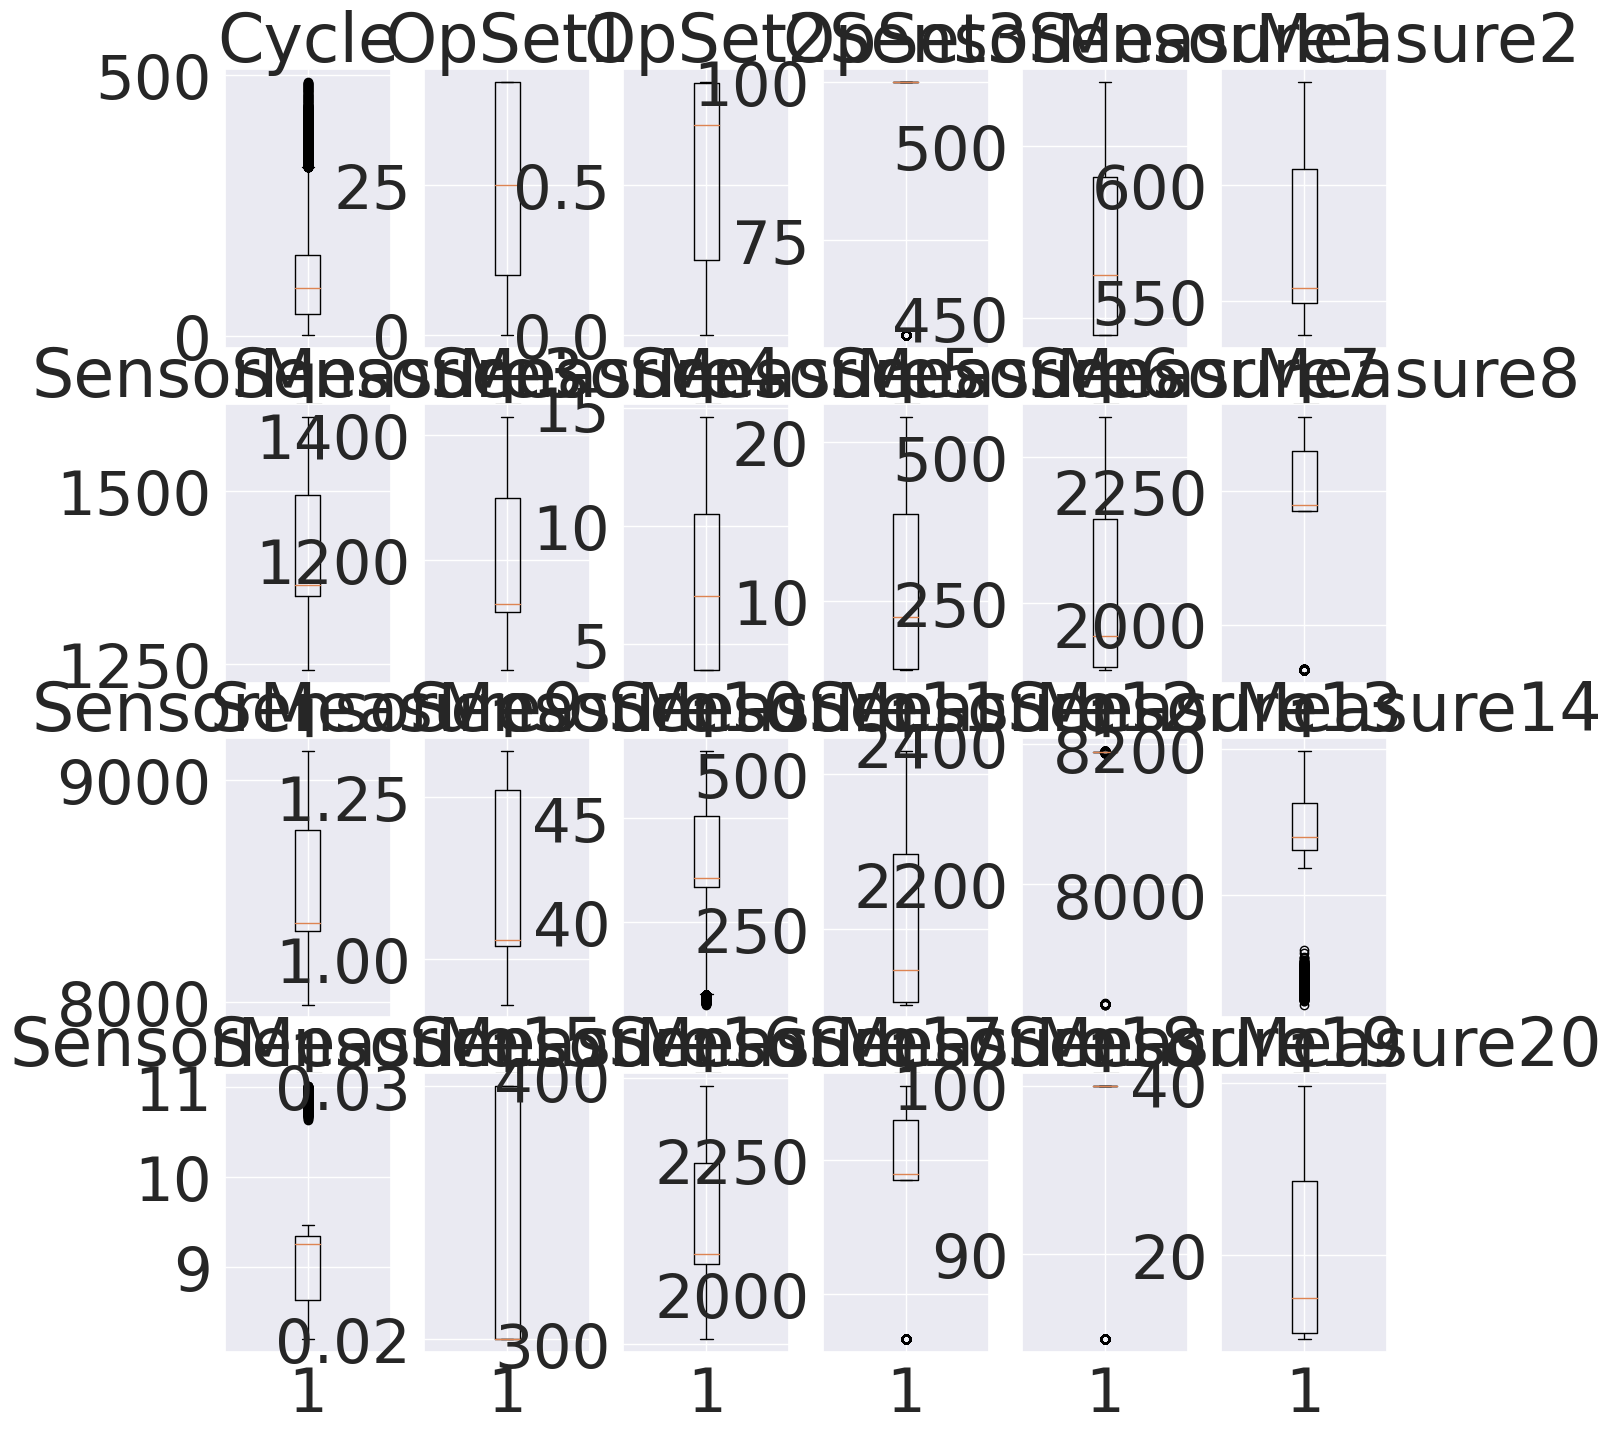

In [ ]:
plt.figure(figsize = (15, 21))
for i in np.arange(1, 25):        # column 5 in python means actual 6th column
    temp = df.iloc[:, i]
    plt.subplot(5,6, i)
    plt.boxplot(temp)           # Make a box and whisker plot.
    plt.title(df.columns[i])
plt.show()

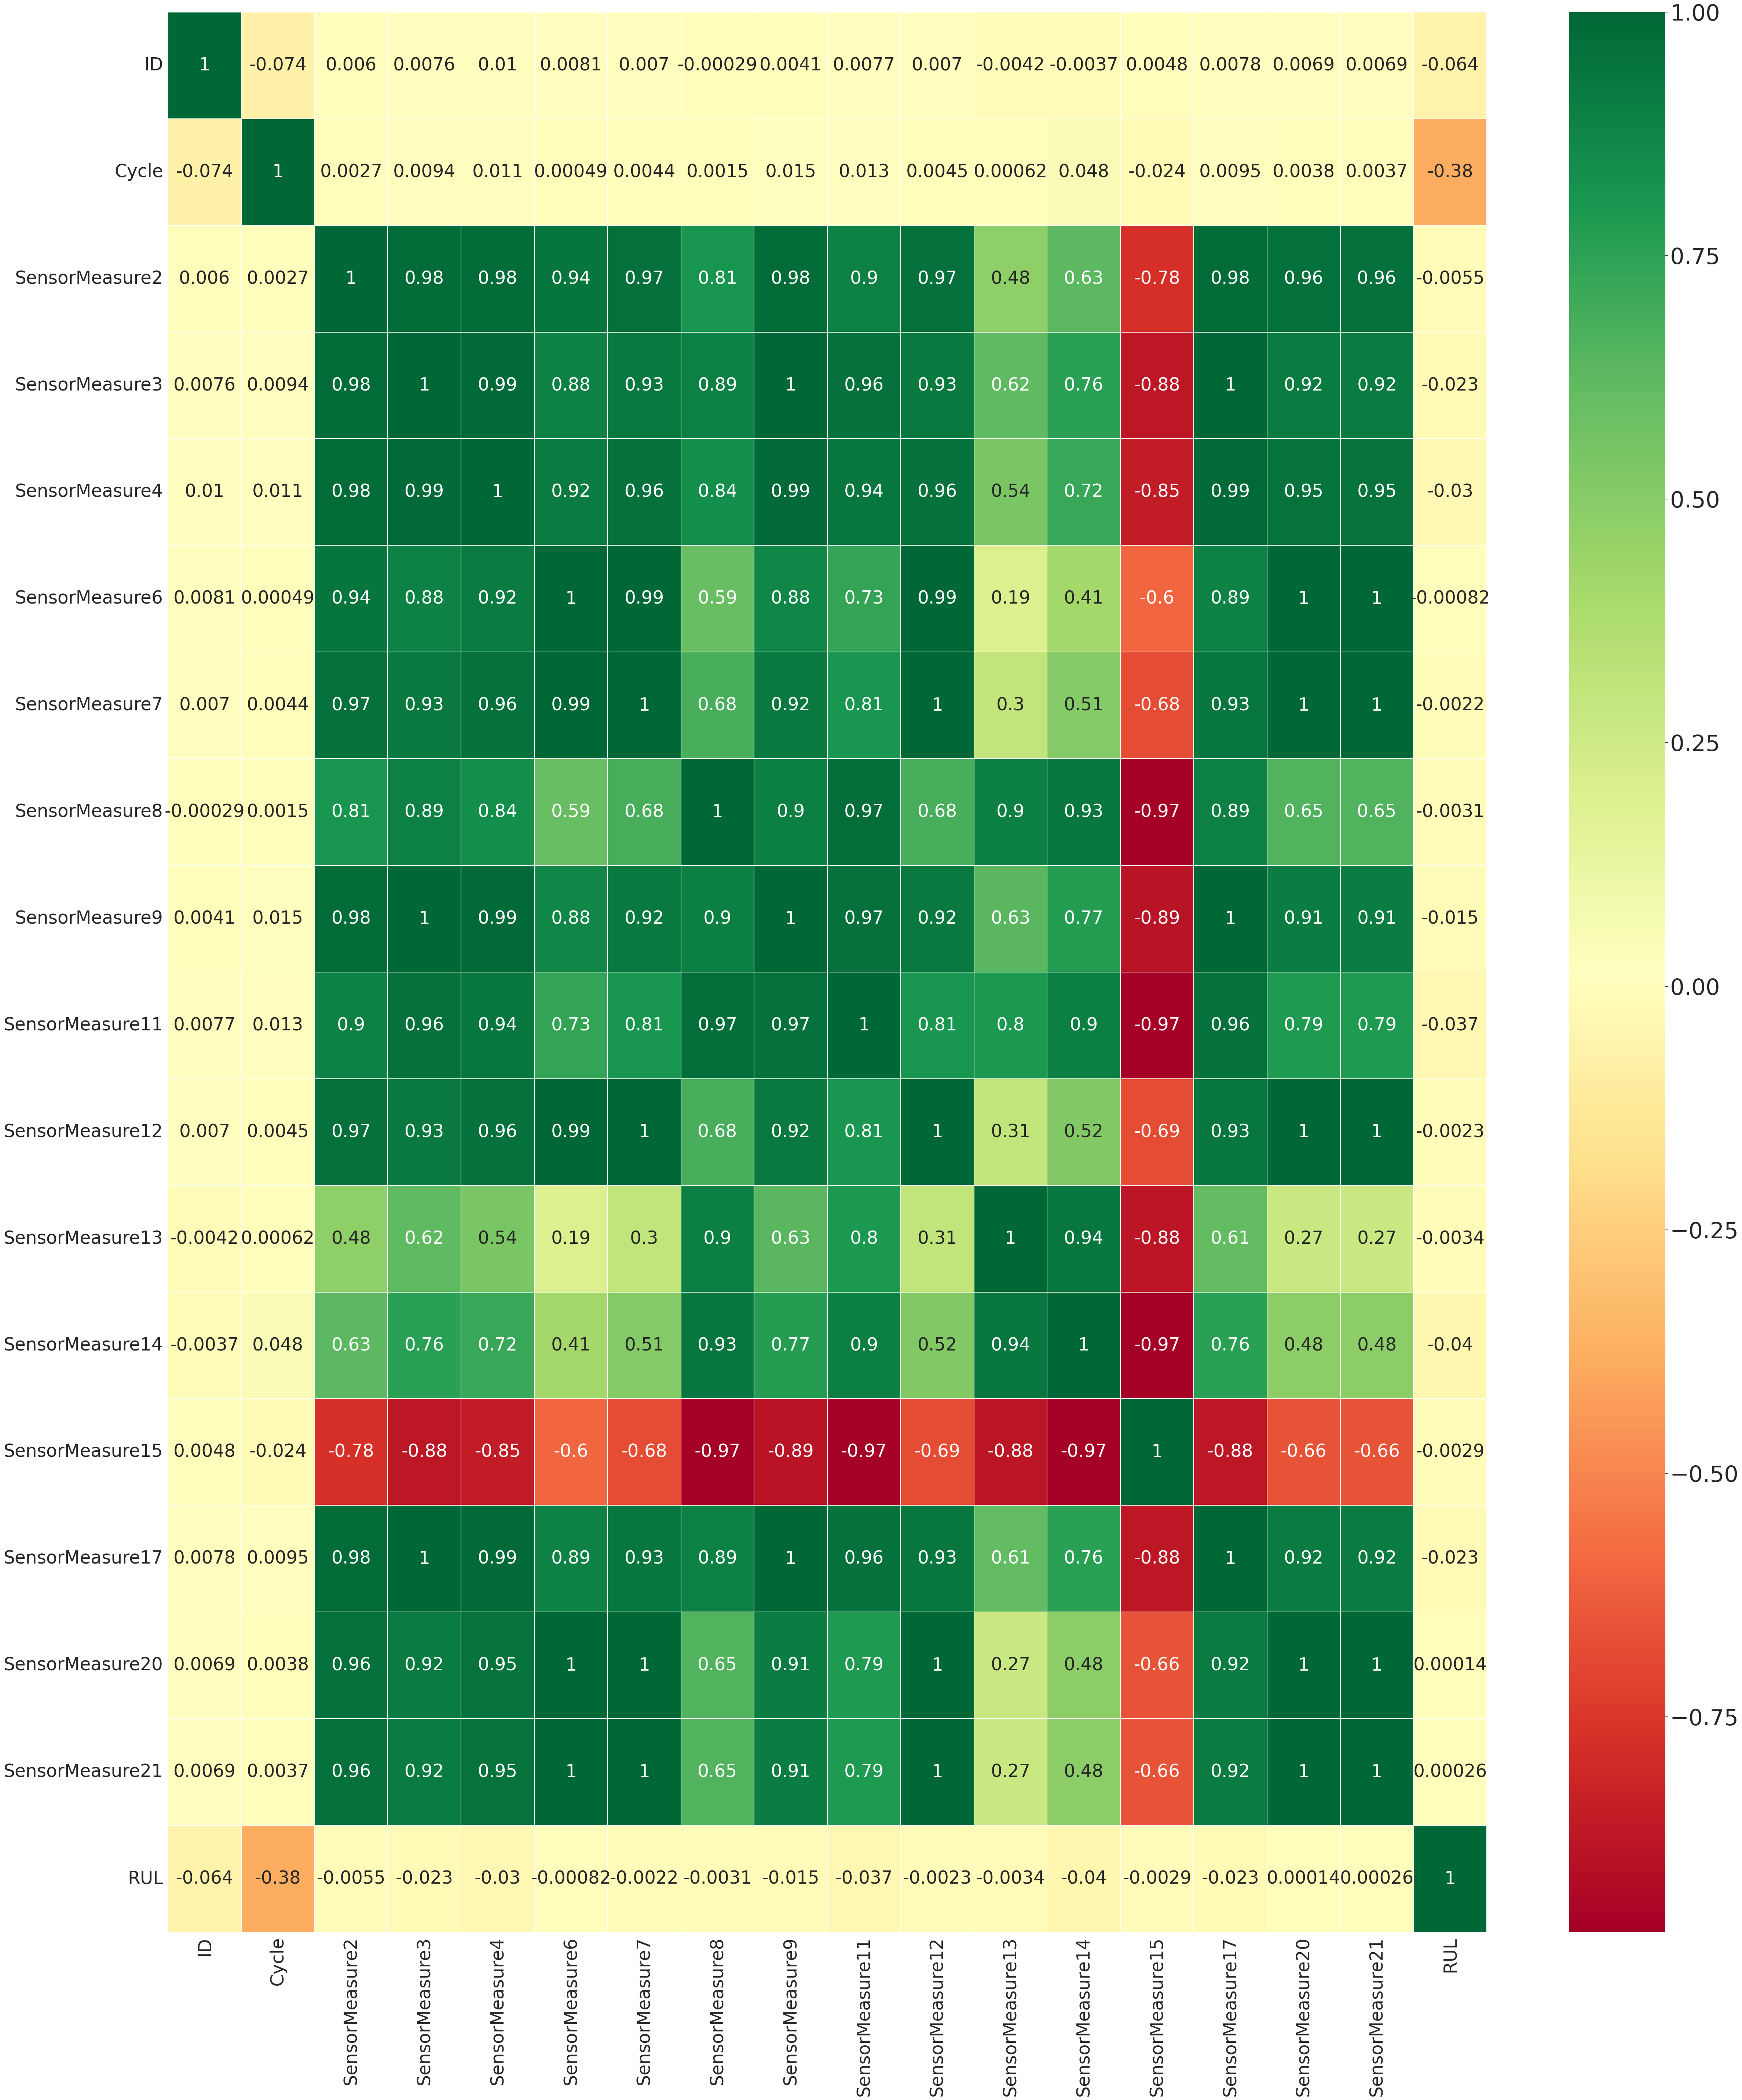

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(58,68))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),cmap="RdYlGn", linewidths=0.1, annot=True, annot_kws={"size":35})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 35)
g.set_yticklabels(g.get_xmajorticklabels(), fontsize = 35)
plt.show()

In [ ]:
df.drop(columns=['OpSet3', 'OpSet2', 'OpSet1', 'SensorMeasure1', 'SensorMeasure5', 'SensorMeasure10', 'SensorMeasure16', 'SensorMeasure18', 'SensorMeasure19'], inplace=True)
df

ID  Cycle  SensorMeasure2  SensorMeasure3  SensorMeasure4  \
0        1      1          606.67         1481.04         1227.81   
1        1      2          536.22         1256.17         1031.48   
2        1      3          549.23         1340.13         1105.88   
3        1      4          549.19         1339.70         1107.26   
4        1      5          555.10         1353.04         1117.80   
...    ...    ...             ...             ...             ...   
41209  248    277          550.30         1364.40         1129.17   
41210  248    278          608.00         1494.75         1260.88   
41211  248    279          555.92         1370.65         1130.97   
41212  248    280          608.19         1489.11         1256.25   
41213  248    281          556.40         1378.58         1140.70   

       SensorMeasure6  SensorMeasure7  SensorMeasure8  SensorMeasure9  \
0               13.60          332.52         2323.67         8704.98   
1                9.00          174.46         1915.21         7999.94   
2                5.69          137.34         2211.93         8305.38   
3                5.69          137.23         2211.89         8301.00   
4                7.97          192.94         2222.71         8331.05   
...               ...             ...             ...             ...   
41209            5.72          138.34         2212.35         8351.73   
41210           13.66          334.75         2324.23         8758.69   
41211            8.00          194.92         2223.57         8370.49   
41212           13.66          333.15         2324.19         8753.04   
41213            8.00          194.26         2223.50         8392.96   

       SensorMeasure11  SensorMeasure12  SensorMeasure13  SensorMeasure14  \
0                43.83           313.03          2387.78          8048.98   
1                36.11           163.61          2028.09          7863.46   
2                41.52           129.98          2387.95          8071.13   
3                41.73           129.48          2387.90          8078.89   
4                41.32           181.82          2387.87          8057.83   
...                ...              ...              ...              ...   
41209            42.30           130.87          2388.50          8112.61   
41210            44.53           314.51          2388.33          8086.83   
41211            42.33           182.76          2388.64          8100.84   
41212            44.78           314.17          2388.37          8085.24   
41213            42.08           181.88          2388.59          8098.17   

       SensorMeasure15  SensorMeasure17  SensorMeasure20  SensorMeasure21  RUL  
0               9.2229              362            24.31          14.7007  251  
1              10.8632              306            14.36           8.5748  250  
2               9.3960              328            10.39           6.4365  249  
3               9.3594              328            10.56           6.2367  248  
4               9.3030              333            14.85           8.9326  247  
...                ...              ...              ...              ...  ...  
41209           9.4427              331            10.53           6.2620   30  
41210           9.2772              366            24.33          14.6486   29  
41211           9.3982              336            14.69           8.8389   28  
41212           9.2727              366            24.44          14.6887   27  
41213           9.3964              335            14.72           8.8502   26  

[41214 rows x 18 columns]

In [ ]:
df.to_csv('Processed_Test_4.csv', index=None)